In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


import warnings
warnings.filterwarnings("ignore")

In [32]:
data  = pd.read_csv("customer_segmentation.csv")

In [33]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [34]:
data.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation       2627
dtype: int64

In [35]:
data.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [36]:
data = data.drop(columns=['ID', 'Gender', 'Ever_Married', 'Graduated', 'Profession',
        'Spending_Score', 'Var_1','Segmentation'])

In [37]:
data.head()

,Age,Work_Experience,Family_Size
0,22,1.0,4.0
1,38,NaN,3.0
2,67,1.0,1.0
3,67,0.0,2.0
4,40,NaN,6.0


In [38]:
data.dropna(inplace=True)

In [39]:
data.isnull().sum()

Age                0
Work_Experience    0
Family_Size        0
dtype: int64

In [40]:
data.head()

,Age,Work_Experience,Family_Size
0,22,1.0,4.0
2,67,1.0,1.0
3,67,0.0,2.0
5,56,0.0,2.0
6,32,1.0,3.0


In [41]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [42]:
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

In [43]:
data_scaled

,Age,Work_Experience,Family_Size
0,-1.294208,-0.476299,0.753491
1,1.418671,-0.476299,-1.198976
2,1.418671,-0.771739,-0.548154
3,0.755523,-0.771739,-0.548154
4,-0.691346,-0.476299,0.102669
...,...,...,...
9231,-0.510488,-0.476299,-0.548154
9232,-0.872205,1.887218,0.753491
9233,-0.510488,-0.476299,-1.198976
9234,0.212947,-0.476299,1.404313


In [44]:
inertia_values = []
silhouette_scores = []
k_values = range(2, 11)



In [45]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia_values.append(kmeans.inertia_)
    silhouette = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette)


In [46]:
print("silhouette_scores",silhouette_scores)

silhouette_scores [0.2694972009523862, 0.3543380730251626, 0.3518603609419625, 0.3564238777133812, 0.3628521673234189, 0.35808478192629734, 0.3515340641431588, 0.3404450498912364, 0.34820568097654847]


In [47]:
print("inertia_values",inertia_values) 

inertia_values [20124.07109280253, 13014.66468161169, 9801.312707154424, 8531.05058881543, 7323.934017203183, 6309.327486234026, 5837.207684092003, 5495.217968385089, 5230.415340103137]


Text(0, 0.5, 'Inertia')

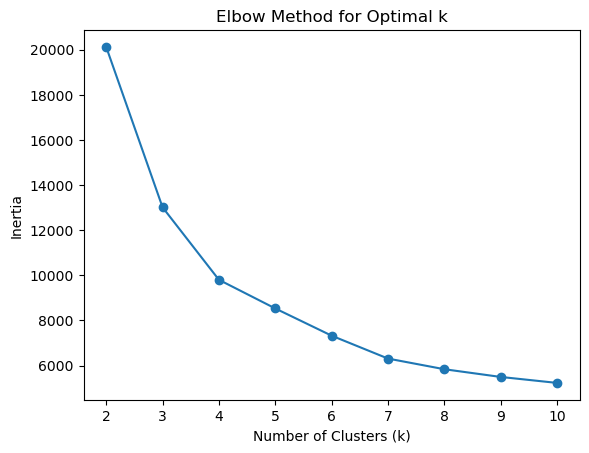

In [48]:
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')    
plt.ylabel('Inertia')

Text(0.5, 1.0, 'silhouette_score method ')

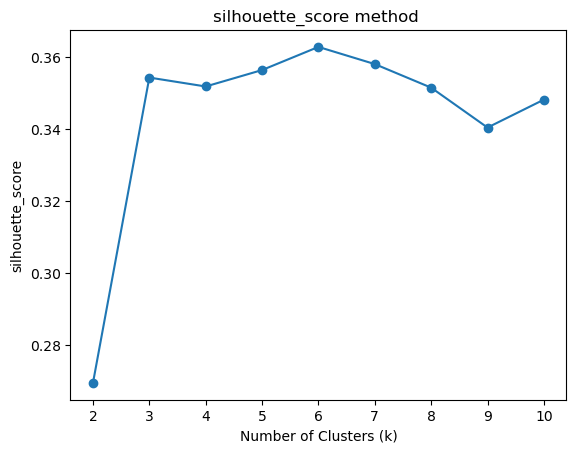

In [49]:
plt.plot(k_values, silhouette_scores, marker='o')

plt.xlabel('Number of Clusters (k)')
plt.ylabel('silhouette_score')
plt.title('silhouette_score method ')

In [51]:
elbow_k = 7
silhouette = 6

In [54]:
kmeans_elbow = KMeans(n_clusters=elbow_k, random_state=42)
kmeans_elbow.fit(data_scaled)

KMeans(n_clusters=7, random_state=42)

In [55]:
kmeans_silhouette = KMeans(n_clusters=elbow_k, random_state=42)
kmeans_silhouette.fit(data_scaled)

KMeans(n_clusters=7, random_state=42)

In [56]:
kmeans_elbow.labels_

array([0, 1, 1, ..., 4, 2, 3])

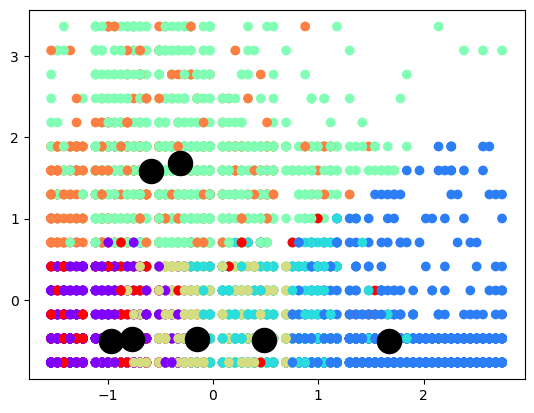

In [61]:
plt.scatter(data_scaled.iloc[:, 0], data_scaled.iloc[:, 1], c=kmeans_elbow.labels_, cmap='rainbow')
plt.scatter(kmeans_elbow.cluster_centers_[:, 0], kmeans_elbow.cluster_centers_[:, 1], s=300, c='black', marker='o')

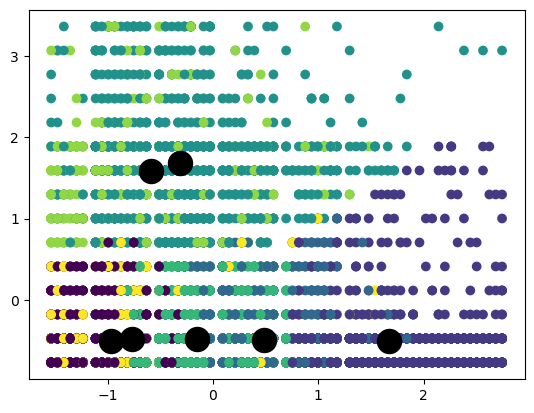

In [63]:
plt.scatter(data_scaled.iloc[:, 0], data_scaled.iloc[:, 1], c=kmeans_silhouette.labels_, cmap='viridis')
plt.scatter(kmeans_silhouette.cluster_centers_[:, 0], kmeans_silhouette.cluster_centers_[:, 1], s=300, c='black', marker='o')